# 1) Choose or modify one scenario

In [ ]:
# 1x2 Robot, 90° Rotation, 18x18 Occu. Grid, 1 Obstacle in middle

%matplotlib widget
import matplotlib.pyplot as plt
from occupancy_grid import add_obstacle, generate_empty_occupancy_grid, plot_occupancy_grid

# Robotermaße
robot_width = 1
robot_length = 2

# Plots
optional_plots = True # Set true only for width/height <= 30px and rotation_step >= 30° (Very resource intensive)
gradient_decent_plots = True # Set true only for width/height < 20px and rotation_step = 90° (Very resource intensive)

# Rotationsgranularität
rotation_step = 90

# Start- und Zielpunkt festlegen
start_point = (2, 14, 0)
goal_point = (13, 4, 0)
current_position=start_point

# Obstacles
occupancy_grid = generate_empty_occupancy_grid(
    width=18,
    length=18
)
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=3,
    length=3,
    x=7,
    y=8)

fig = plt.figure()
plot_axis = fig.add_subplot(111)
plot_occupancy_grid(
    occupancy_grid=occupancy_grid, 
    goal_point=goal_point, 
    current_position=current_position, 
    plot_axis=plot_axis, 
    robot_width=robot_width, 
    robot_length=robot_length,
    ticks=True,
    start_point=start_point,
    rotation_step=rotation_step)
plt.show()

In [ ]:
# 1x1 Robot, 90° Rotation, 18x18 Occu. Grid, Trapped in "<"

%matplotlib widget
import matplotlib.pyplot as plt
from occupancy_grid import add_obstacle, generate_empty_occupancy_grid, plot_occupancy_grid

# Robotermaße
robot_width = 1
robot_length = 1

# Rotationsgranularität
rotation_step = 90

# Plots
optional_plots = True # Set true only for width/height <= 30px and rotation_step >= 30° (Very resource intensive)
gradient_decent_plots = True # Set true only for width/height < 20px and rotation_step = 90° (Very resource intensive)

# Start- und Zielpunkt festlegen
start_point = (7, 9, 0)
goal_point = (10, 6, 2)
current_position=start_point

# Obstacles
occupancy_grid = generate_empty_occupancy_grid(
    length=18,
    width=18
)
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=5,
    length=1,
    x=4,
    y=7)
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=1,
    length=5,
    x=9,
    y=8)

fig = plt.figure()
plot_axis = fig.add_subplot(111)
plot_occupancy_grid(
    occupancy_grid=occupancy_grid, 
    goal_point=goal_point, 
    current_position=current_position, 
    plot_axis=plot_axis, 
    robot_width=robot_width, 
    robot_length=robot_length,
    ticks=True,
    start_point=start_point,
    rotation_step=rotation_step)
plt.show()

In [ ]:
# 1x3 Robot, 45° Rotation, 18x18 Occu. Grid, Flipped + closed "U"

%matplotlib widget
import matplotlib.pyplot as plt
from occupancy_grid import add_obstacle, generate_empty_occupancy_grid, plot_occupancy_grid

robot_width = 1
robot_length = 3

# Rotationsgranularität
rotation_step = 45

# Plots
optional_plots = True # Set true only for width/height <= 30px and rotation_step >= 30° (Very resource intensive)
gradient_decent_plots = False # Set true only for width/height < 20px and rotation_step = 90° (Very resource intensive)

# Start- und Zielpunkt festlegen
start_point = (12, 8, 0)
goal_point = (15, 10, 4)
current_position=start_point

# Obstacles
occupancy_grid = generate_empty_occupancy_grid(
    length=18,
    width=18
)
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=10,
    length=1,
    x=4,
    y=1)
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=1,
    length=15,
    x=13,
    y=1)
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=10,
    length=1,
    x=4,
    y=16)

fig = plt.figure()
plot_axis = fig.add_subplot(111)
plot_occupancy_grid(
    occupancy_grid=occupancy_grid, 
    goal_point=goal_point, 
    current_position=current_position, 
    plot_axis=plot_axis, 
    robot_width=robot_width, 
    robot_length=robot_length,
    ticks=True,
    start_point=start_point,
    rotation_step=rotation_step)
plt.show()

In [ ]:
# 1x3 Robot, 45° Rotation, 18x18 Occu. Grid, Flipped + opened "U"

%matplotlib widget
import matplotlib.pyplot as plt
from occupancy_grid import add_obstacle, generate_empty_occupancy_grid, plot_occupancy_grid

# Robotermaße
robot_width = 1
robot_length = 3

# Rotationsgranularität
rotation_step = 45

# Plots
optional_plots = True # Set true only for width/height <= 30px and rotation_step >= 30° (Very resource intensive)
gradient_decent_plots = False # Set true only for width/height < 20px and rotation_step = 90° (Very resource intensive)

# Start- und Zielpunkt festlegen
start_point = (12, 8, 0)
goal_point = (15, 10, 4)
current_position=start_point

# Obstacles
occupancy_grid = generate_empty_occupancy_grid(
    length=18,
    width=18
)
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=8,
    length=1,
    x=4,
    y=1)
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=1,
    length=16,
    x=13,
    y=1)
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=8,
    length=1,
    x=4,
    y=16)

fig = plt.figure()
plot_axis = fig.add_subplot(111)
plot_occupancy_grid(
    occupancy_grid=occupancy_grid, 
    goal_point=goal_point, 
    current_position=current_position, 
    plot_axis=plot_axis, 
    robot_width=robot_width, 
    robot_length=robot_length,
    ticks=True,
    start_point=start_point,
    rotation_step=rotation_step)
plt.show()

In [ ]:
# 1x5 Robot, 30° Rotation, 18x18 Occu. Grid, Gap in "|"

%matplotlib widget
import matplotlib.pyplot as plt
from occupancy_grid import add_obstacle, generate_empty_occupancy_grid, plot_occupancy_grid

robot_width = 1
robot_length = 5

# Rotationsgranularität
rotation_step = 30

# Plots
optional_plots = True # Set true only for width/height <= 30px and rotation_step >= 30° (Very resource intensive)
gradient_decent_plots = False # Set true only for width/height < 20px and rotation_step = 90° (Very resource intensive)

# Start- und Zielpunkt festlegen
start_point = (5, 2, 0)
goal_point = (12, 15,6)
current_position= start_point

occupancy_grid = generate_empty_occupancy_grid(
    length=18,
    width=18
)
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=1,
    length=5,
    x=8,
    y=2)
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=1,
    length=5,
    x=8,
    y=11)

fig = plt.figure()
plot_axis = fig.add_subplot(111)
plot_occupancy_grid(
    occupancy_grid=occupancy_grid, 
    goal_point=goal_point, 
    current_position=current_position, 
    plot_axis=plot_axis, 
    robot_width=robot_width, 
    robot_length=robot_length,
    ticks=True,
    start_point=start_point,
    rotation_step=rotation_step)
plt.show()

In [ ]:
# 3x5 Robot, 45° Rotation, 20x12 Occu. Grid, Multiple narrow spots

%matplotlib widget
import matplotlib.pyplot as plt
from occupancy_grid import add_obstacle, generate_empty_occupancy_grid, plot_occupancy_grid

robot_width = 3
robot_length = 5

# Rotationsgranularität
rotation_step = 45

# Plots
optional_plots = False # Set true only for width/height <= 30px and rotation_step >= 30° (Very resource intensive)
gradient_decent_plots = False # Set true only for width/height < 20px and rotation_step = 90° (Very resource intensive)

# Start- und Zielpunkt festlegen
start_point = (0, 0, 0)
goal_point = (14, 10, 2)
current_position=start_point

# Obstacles
occupancy_grid = generate_empty_occupancy_grid(width=20, length=12)
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=1,
    length=6,
    x=5,
    y=0)
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=1,
    length=3,
    x=5,
    y=10)
    

occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=1,
    length=7,
    x=12,
    y=4)

occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=4,
    length=1,
    x=12,
    y=5)

fig = plt.figure()
plot_axis = fig.add_subplot(111)
plot_occupancy_grid(
    occupancy_grid=occupancy_grid, 
    goal_point=goal_point, 
    current_position=current_position, 
    plot_axis=plot_axis, 
    robot_width=robot_width, 
    robot_length=robot_length,
    ticks=True,
    start_point=start_point,
    rotation_step=rotation_step)
plt.show()

In [ ]:
# !!! 3x5 Robot, 10° Rotation, 20x12 Occu. Grid, Multiple narrow spots

%matplotlib widget
import matplotlib.pyplot as plt
from occupancy_grid import add_obstacle, generate_empty_occupancy_grid, plot_occupancy_grid

robot_width = 3
robot_length = 5

# Rotationsgranularität
rotation_step = 10

# Plots
optional_plots = False # Set true only for width/height <= 30px and rotation_step >= 30° (Very resource intensive)
gradient_decent_plots = False # Set true only for width/height < 20px and rotation_step = 90° (Very resource intensive)

# Start- und Zielpunkt festlegen
start_point = (0, 0, 0)
goal_point = (14, 10, 9)
current_position=start_point

# Obstacles
occupancy_grid = generate_empty_occupancy_grid(width=20, length=12)
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=1,
    length=6,
    x=5,
    y=0)
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=1,
    length=3,
    x=5,
    y=10)
    

occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=1,
    length=7,
    x=12,
    y=4)

occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=4,
    length=1,
    x=12,
    y=5)

fig = plt.figure()
plot_axis = fig.add_subplot(111)
plot_occupancy_grid(
    occupancy_grid=occupancy_grid, 
    goal_point=goal_point, 
    current_position=current_position, 
    plot_axis=plot_axis, 
    robot_width=robot_width, 
    robot_length=robot_length,
    ticks=True,
    start_point=start_point,
    rotation_step=rotation_step)
plt.show()

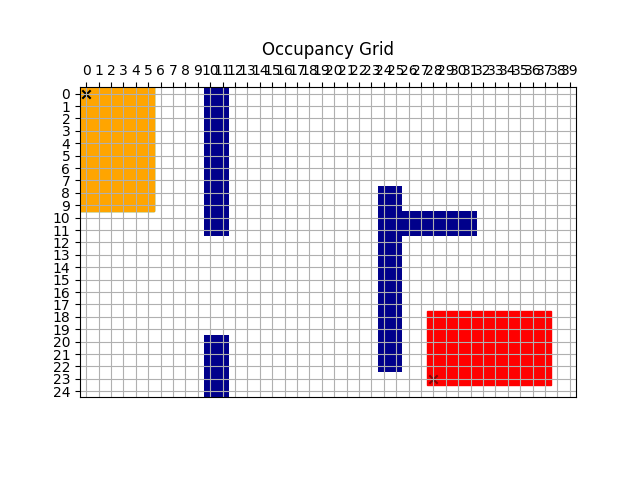

In [1]:
# 6x10 Robot, 10° Rotation, 40x25 Occu. Grid, Multiple narrow spots

%matplotlib widget
import matplotlib.pyplot as plt
from occupancy_grid import add_obstacle, generate_empty_occupancy_grid, plot_occupancy_grid

robot_width = 6
robot_length = 10

# Rotationsgranularität
rotation_step = 10

# Plots
optional_plots = False # Set true only for width/height <= 30px and rotation_step >= 30° (Very resource intensive)
gradient_decent_plots = False # Set true only for width/height < 20px and rotation_step = 90° (Very resource intensive)

# Start- und Zielpunkt festlegen
start_point = (0, 0, 0)
goal_point = (28, 23, 9)
current_position=start_point

# Obstacles
occupancy_grid = generate_empty_occupancy_grid(width=40, length=25)
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=2,
    length=12,
    x=10,
    y=0)
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=2,
    length=5,
    x=10,
    y=20)
    

occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=2,
    length=15,
    x=24,
    y=8)

occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=8,
    length=2,
    x=24,
    y=10)

fig = plt.figure()
plot_axis = fig.add_subplot(111)
plot_occupancy_grid(
    occupancy_grid=occupancy_grid, 
    goal_point=goal_point, 
    current_position=current_position, 
    plot_axis=plot_axis, 
    robot_width=robot_width, 
    robot_length=robot_length,
    ticks=True,
    start_point=start_point,
    rotation_step=rotation_step)
plt.show()

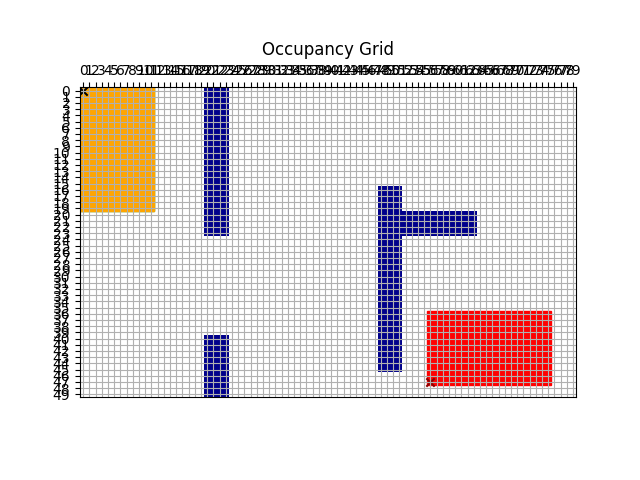

No such comm: f397791befcb4f189c91b36d47e3b6f8
No such comm: f397791befcb4f189c91b36d47e3b6f8


In [2]:
# 12x20 Robot, 10° Rotation, 80x50 Occu. Grid, Multiple narrow spots

%matplotlib widget
import matplotlib.pyplot as plt
from occupancy_grid import add_obstacle, generate_empty_occupancy_grid, plot_occupancy_grid

robot_width = 12
robot_length = 20

# Rotationsgranularität
rotation_step = 10

# Plots
optional_plots = False # Set true only for width/height <= 30px and rotation_step >= 30° (Very resource intensive)
gradient_decent_plots = False # Set true only for width/height < 20px and rotation_step = 90° (Very resource intensive)

# Start- und Zielpunkt festlegen
start_point = (0, 0, 0)
goal_point = (56, 47, 9)
current_position=start_point

# Obstacles
occupancy_grid = generate_empty_occupancy_grid(width=80, length=50)
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=4,
    length=24,
    x=20,
    y=0)
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=4,
    length=10,
    x=20,
    y=40)
    

occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=4,
    length=30,
    x=48,
    y=16)

occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=16,
    length=4,
    x=48,
    y=20)

fig = plt.figure()
plot_axis = fig.add_subplot(111)
plot_occupancy_grid(
    occupancy_grid=occupancy_grid, 
    goal_point=goal_point, 
    current_position=current_position, 
    plot_axis=plot_axis, 
    robot_width=robot_width, 
    robot_length=robot_length,
    ticks=True,
    start_point=start_point,
    rotation_step=rotation_step)
plt.show()

In [ ]:
# 24x40 Robot, 5° Rotation, 160x100 Occu. Grid, Multiple narrow spots

%matplotlib widget
import matplotlib.pyplot as plt
from occupancy_grid import add_obstacle, generate_empty_occupancy_grid, plot_occupancy_grid

robot_width = 24
robot_length = 40

# Rotationsgranularität
rotation_step = 5

# Plots
optional_plots = False # Set true only for width/height <= 30px and rotation_step >= 30° (Very resource intensive)
gradient_decent_plots = False # Set true only for width/height < 20px and rotation_step = 90° (Very resource intensive)

# Start- und Zielpunkt festlegen
start_point = (0, 0, 0)
goal_point = (112, 94, 18)
current_position=start_point

# Obstacles
occupancy_grid = generate_empty_occupancy_grid(width=160, length=100)
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=8,
    length=48,
    x=40,
    y=0)
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=8,
    length=20,
    x=40,
    y=80)
    

occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=8,
    length=60,
    x=96,
    y=32)

occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=32,
    length=8,
    x=96,
    y=40)

fig = plt.figure()
plot_axis = fig.add_subplot(111)
plot_occupancy_grid(
    occupancy_grid=occupancy_grid, 
    goal_point=goal_point, 
    current_position=current_position, 
    plot_axis=plot_axis, 
    robot_width=robot_width, 
    robot_length=robot_length,
    ticks=True,
    start_point=start_point,
    rotation_step=rotation_step)
plt.show()

# 2) Computations

In [2]:
# Compute Configuration Space
from configuration_space import compute_configuration_space

configuration_space = compute_configuration_space(
    robot_length=robot_length, 
    robot_width=robot_width, 
    rotation_step=rotation_step, 
    occupancy_grid=occupancy_grid)


# Compute potentials
from potential import compute_potential_attraction_repulsion, compute_potential_wavefront

#potential = compute_potential_attraction_repulsion(
#    configuration_space=configuration_space,
#    goal=goal_point
#)
potential = compute_potential_wavefront(
    configuration_space=configuration_space,
    goal=goal_point
)


# Compute Gradients
from gradients import compute_gradients, compute_obstacle_gradients, fix_local_maxima

force_field_x, force_field_y, force_field_rotation = compute_gradients(potential, goal_point)
compute_obstacle_gradients(force_field_x, force_field_y, force_field_rotation, potential)
fix_local_maxima(force_field_x, force_field_y, force_field_rotation, potential, goal_point)

# 3) Plots (optional)

In [ ]:
if not optional_plots:
    raise Exception("For this scenario, plots will be very CPU intensive. Comment out this line to proceed nevertheless. ")

# Plot Expanded Occupancy Grids
from occupancy_grid import plot_occupancy_grid
import numpy as np

rotations = np.arange(0, 360, rotation_step)
fig = plt.figure(figsize=(10, 2*len(rotations)))
fig.suptitle('Expanded Occupancy Grids')
for index, rotation in enumerate(rotations):      
    ax_occupancy_grid = fig.add_subplot(int(np.ceil(len(rotations)/3)), 3, index+1)
    plot_occupancy_grid(
        occupancy_grid=configuration_space[index], 
        goal_point=goal_point, 
        plot_axis=ax_occupancy_grid, 
        start_point=start_point,
        plot_title="Occupancy Grid " + str(rotation) + "° Rotation",
        ticks=False,
        rotation_step = rotation_step)
plt.show()


# Plot 3D Configuration Space
import numpy as np
import matplotlib.pyplot as plt
from configuration_space import plot_configuration_space

fig = plt.figure(figsize=(10, 8))
fig.suptitle('3D Configuration Space')
plot_axis = fig.add_subplot(111, projection='3d')
plot_configuration_space(
    configuration_space=configuration_space, 
    goal_point=goal_point,
    start_point=start_point,
    rotation_step=rotation_step,
    ax=plot_axis)
plt.show()


# Plot Potential

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from potential import plot_potential_stacked, plot_potential_slice

rotations = np.arange(0, 360, rotation_step)
fig = plt.figure(figsize=(10, 3*len(rotations)))
fig.suptitle('Potential (Stacked and per Rotation Layer)')
ax_potential_stacked = fig.add_subplot(1 + int(np.ceil(len(rotations)/3)), 3, (1,3), projection='3d')
plot_potential_stacked(potential, 'Potential (all Rotations)', ax_potential_stacked)
for index, rotation in enumerate(rotations):      
    ax_potential_slice = fig.add_subplot(1 + int(np.ceil(len(rotations)/3)), 3, 4 + index, projection='3d')
    plot_potential_slice(potential[index], 'Potential for\n' + str(rotation) + '° Rotation', ax_potential_slice)
plt.show()


# Plot Gradients ("Force Field")

from configuration_space import plot_configuration_space

fig = plt.figure(figsize=(10, 8))
fig.suptitle('Force Field (Gradients)')
plot_axis = fig.add_subplot(111, projection='3d')
plot_configuration_space(
    configuration_space=configuration_space, 
    force_field_x=force_field_x, 
    force_field_y=force_field_y, 
    force_field_rotation=force_field_rotation, 
    goal_point=goal_point, 
    ax=plot_axis,
    rotation_step=rotation_step)
plt.show()

# 4) Gradient Descent Preparation

NameError: name 'configuration_space' is not defined

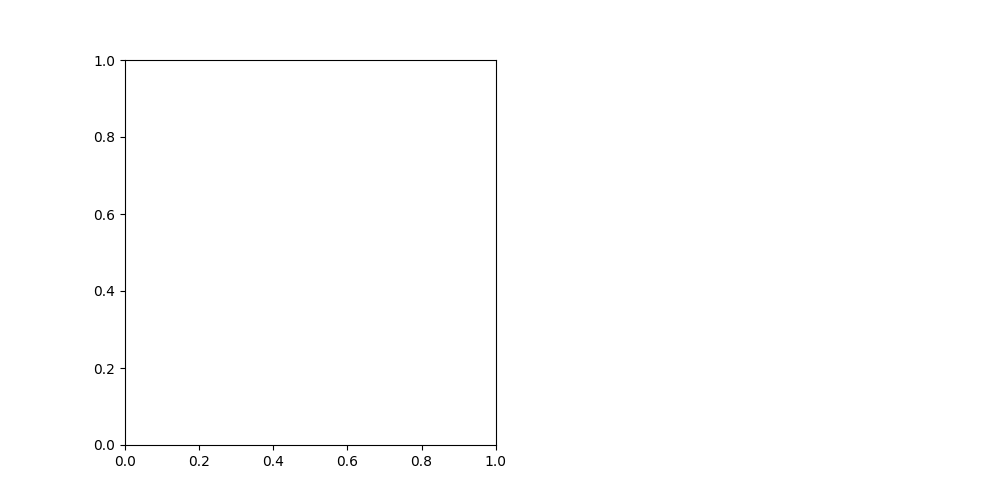

In [2]:
from gradients import update_gradient_descent_plots
import numpy as np
from time import sleep
from gradients import gradient_descent_step

if gradient_decent_plots:
    rotations = np.arange(0, 360, rotation_step)
else:
    rotations = []

fig = plt.figure(figsize=(10, 5 + 2 * len(rotations)))

if gradient_decent_plots:
    ax_cs_2D = []
    for index, rotation in enumerate(rotations):      
        ax_cs_2D.append(fig.add_subplot(1 + int(np.ceil(len(rotations)/4)), 4, 4 + index+1))
    ax_cs_3D = fig.add_subplot(1 + int(np.ceil(len(rotations)/4)), 4, (3,4), projection='3d')
else:
    ax_cs_2D = []    
    ax_cs_3D = None

ax_occupancy_grid = fig.add_subplot(1 + int(np.ceil(len(rotations)/4)), 4, (1,2))


path = []

update_gradient_descent_plots(
        occupancy_grid=occupancy_grid,
        configuration_space=configuration_space,
        start_point=start_point,
        goal_point=goal_point,
        current_position=current_position,
        robot_width=robot_width,
        robot_length=robot_length,
        rotation_step=rotation_step,
        ax_occupancy_grid=ax_occupancy_grid,
        ax_cs_2D=ax_cs_2D,
        ax_cs_3D=ax_cs_3D,
        force_field_x=force_field_x,
        force_field_y=force_field_y,
        force_field_rotation=force_field_rotation,
        gradient_decent_plots=gradient_decent_plots,
        path=path)

fig.suptitle('Please execute cell below')

fig.canvas.draw()

# 5) Gradient Descent Execution (Watch figure above!)

In [4]:
fig.suptitle("Descending Gradients ...")

try:
    while True:
        current_position = gradient_descent_step(
                            current_position=current_position,
                            force_field_x=force_field_x,
                            force_field_y=force_field_y,
                            force_field_rotation=force_field_rotation,
                            path=path,
                            goal_point=goal_point)  

        update_gradient_descent_plots(
            occupancy_grid=occupancy_grid,
            configuration_space=configuration_space,
            start_point=start_point,
            goal_point=goal_point,
            current_position=current_position,
            robot_width=robot_width,
            robot_length=robot_length,
            rotation_step=rotation_step,
            ax_occupancy_grid=ax_occupancy_grid,
            ax_cs_2D=ax_cs_2D,
            ax_cs_3D=ax_cs_3D,
            force_field_x=force_field_x,
            force_field_y=force_field_y,
            force_field_rotation=force_field_rotation,
            gradient_decent_plots=gradient_decent_plots,
            path=path)
        
        sleep(0.5)
        fig.canvas.draw()
except Exception as e:
    fig.suptitle(e)

